In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [4]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [7]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [10]:
# build Model
# The columns that we will be making predictions with
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#The column that we will be making predictions on
y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
param_test1 = {
 'max_depth': range(2, 10),   
 'min_samples_split': [3, 5, 7, 10],
 'min_samples_leaf': [3, 5, 7, 10]
}

grid_result = GridSearchCV(DecisionTreeClassifier(), param_grid=param_test1, cv=10, n_jobs=-1, verbose=1)
grid_result.fit(X_train, y_train)

print("Best: ", (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.3s


Best:  (0.8202764976958525, {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3})


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    5.6s finished


In [13]:
predicted = grid_result.predict(X_test)
print (format(metrics.accuracy_score(y_test, predicted) * 100,'.2f'), '%.')

82.46 %.


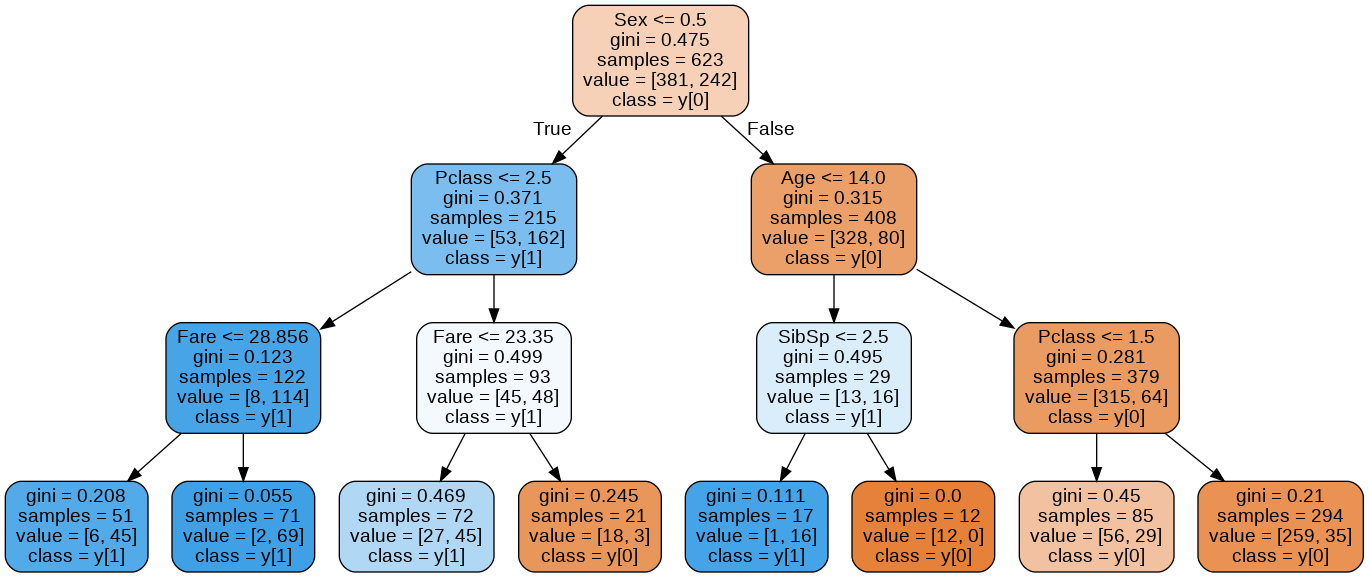

In [14]:
dot_data = tree.export_graphviz(grid_result.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
                                class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [15]:
grid_result.predict_proba(np.array([[2, 1, 3, 0, 2, 0.0]]))

array([[0.05882353, 0.94117647]])